<a href="https://colab.research.google.com/github/Giomacias96/Estructura_de_Datos/blob/main/Reporte_De_Fallas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('export.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt                                                                                                                                                                       
import matplotlib.ticker as plticker
import seaborn as sns
%matplotlib inline
sns.set()
plt.rc('figure', figsize=(15, 10))

In [ ]:
from collections import Counter

## **Gen4**

In [ ]:
df_gen4 = pd.read_csv('export.csv')
df_gen4[['skuno', 'sysserialno']].groupby('skuno').count()

,sysserialno
skuno,
1A627KB00-600-G,2
1A62ABE00-600-G,74
1A62H4300-600-G,2
1A62H4B00-600-G,1


In [ ]:
df_gen4[['workorderno', 'sysserialno']].groupby('workorderno').count()

,sysserialno
workorderno,
1850085403,2
1850085407,2
1850085409,1
1850085412,32
1850085413,42


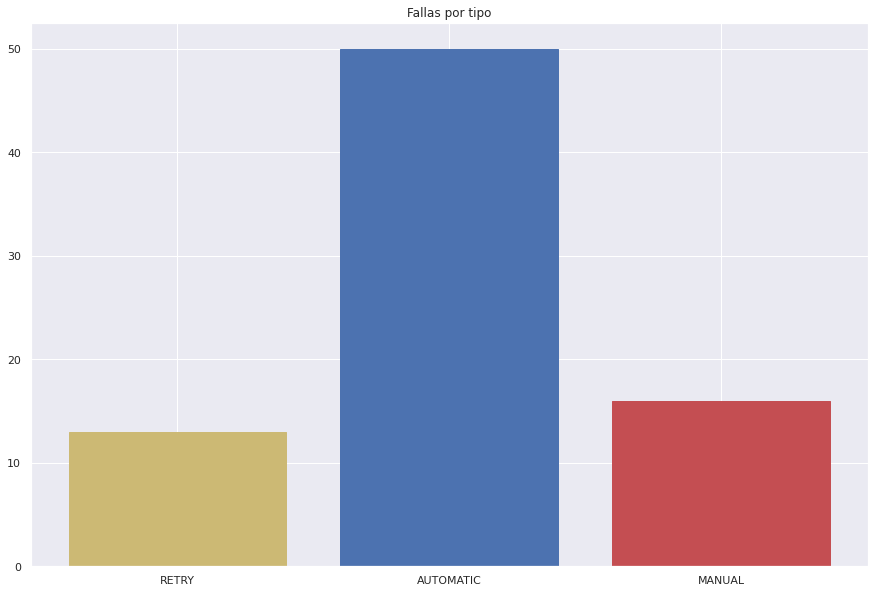

In [ ]:
df_gen4 = df_gen4[df_gen4['failureeventpoint'].notna() & (df_gen4['description'].str.contains('IQPanelGen4') | df_gen4['description'].str.contains('IQ Panel 4') | df_gen4['description'].str.contains('IQ Panel4') | df_gen4['description'].str.contains('IQPanel4') | df_gen4['description'].str.contains('IQ4Hub'))]

if not df_gen4.empty:
    c = Counter(df_gen4.flag)
    bar = plt.bar(c.keys(), c.values())
    bar[0].set_color('y')
    bar[1].set_color('b')
    bar[2].set_color('r')
    plt.title('Fallas por tipo')

Por Codigo de Falla

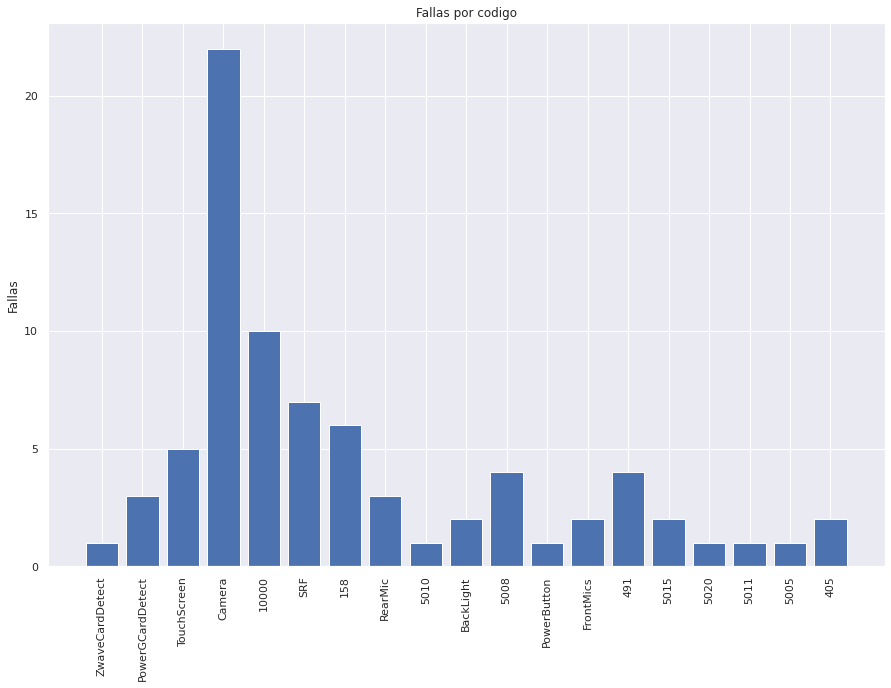

In [ ]:
cleaned = df_gen4[df_gen4['failurecode'].notna()]
c= Counter(cleaned.failurecode)
plt.xticks(rotation=90)

#plt.ylim([0, 100])

#plt.yticks(np.arange(0, 100, 1.0))

plt.bar(c.keys(), c.values())
plt.title('Fallas por codigo')
plt.ylabel('Fallas');

Rear Mic

3


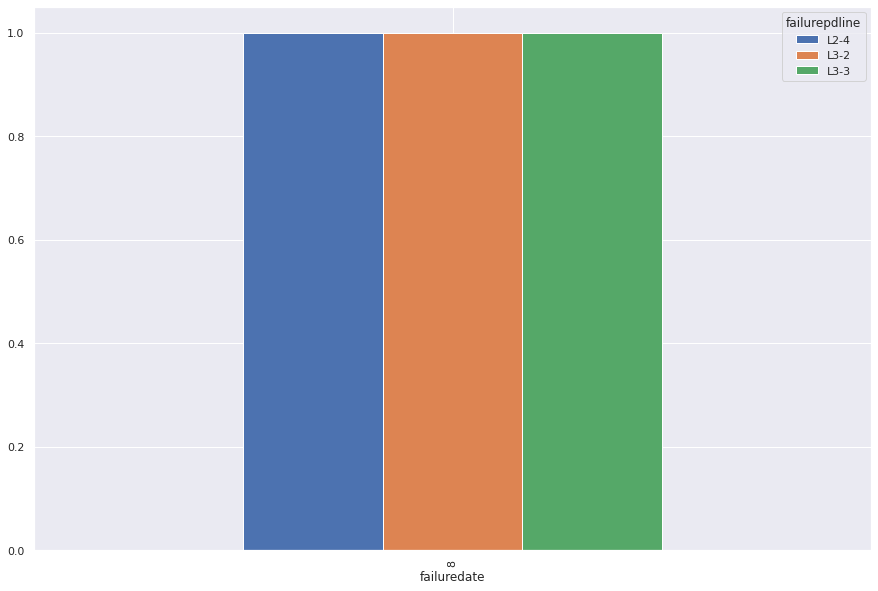

In [ ]:
rear = df_gen4[(df_gen4.failurecode == 'RearMic')]

if not rear.empty:
    times = pd.to_datetime(rear.failuredate)
    pd.crosstab(times.dt.hour, rear['failurepdline']).plot.bar()
    print(rear.flag.count())

In [ ]:
from IPython.display import Markdown as md
total = df_gen4[df_gen4.flag == 'RETRY']
total = total.flag.count()
md('# Restries totales: {}'.format(total))

# Restries totales: 13

Front Mics

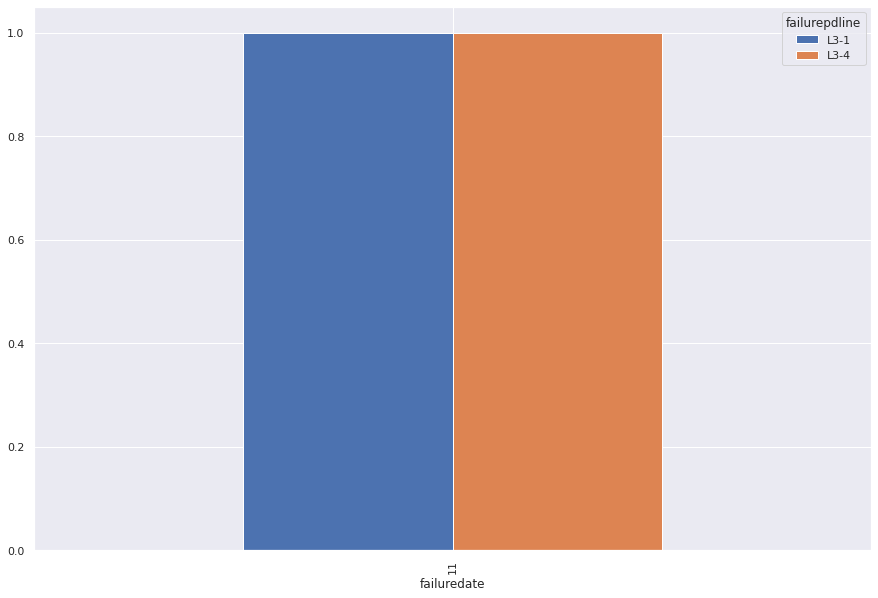

In [ ]:
front = df_gen4[(df_gen4.failurecode == 'FrontMics')]

if not front.empty:
    times = pd.to_datetime(front.failuredate)
    pd.crosstab(times.dt.hour, front['failurepdline']).plot.bar()

PowerG Card

Total:  3


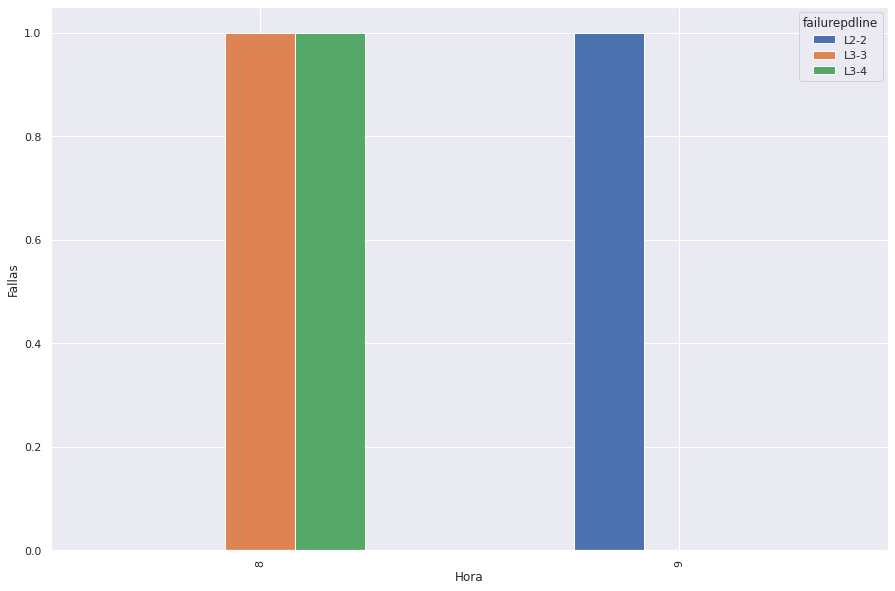

In [ ]:
powerg = df[(df.failurecode == 'PowerGCardDetect')] #& (df.flag == 'RETRY')]
times = pd.to_datetime(powerg.failuredate)

if not powerg.empty:
    times = pd.to_datetime(powerg.failuredate)
    pd.crosstab(times.dt.hour, powerg['failurepdline']).plot.bar()
    plt.ylabel('Fallas')
    plt.xlabel('Hora')
    print("Total: ",powerg.failurecode.count())

SRF

failurepdline
L2-2    1
L2-4    3
L3-4    2
Name: failurecode, dtype: int64


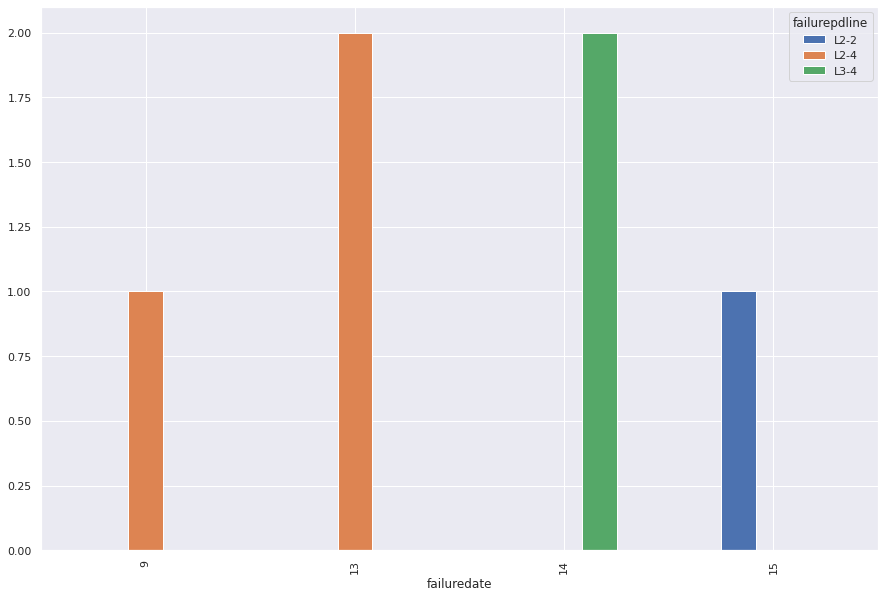

In [ ]:
srf = df_gen4[(df.failurecode == 'SRF') & (df.flag == 'RETRY') ]

if not srf.empty:
    times = pd.to_datetime(srf.failuredate)
    pd.crosstab(times.dt.hour, srf['failurepdline']).plot.bar()
    print(srf.groupby('failurepdline')['failurecode'].count())

Zwave Card Detect

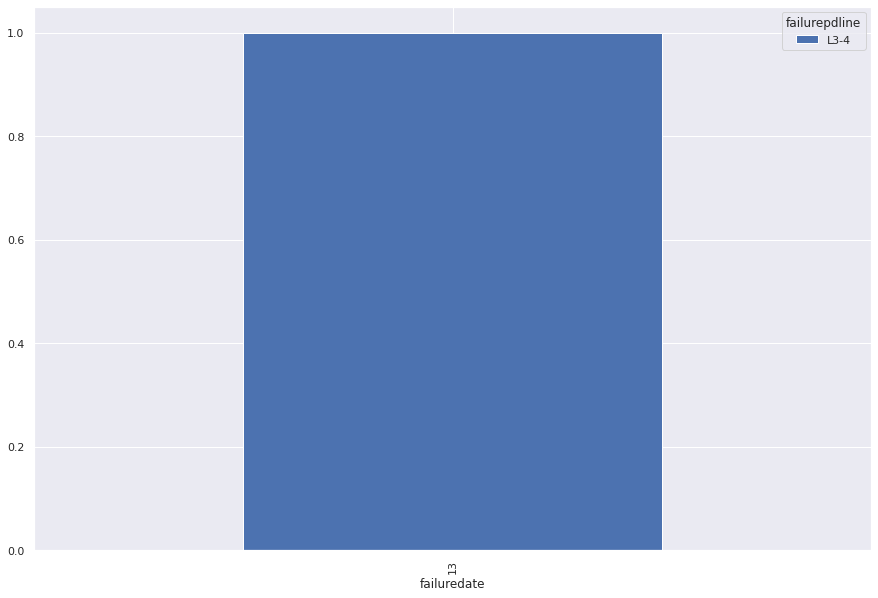

In [ ]:
zwave = df_gen4[(df.failurecode == 'ZwaveCardDetect') & (df.flag == 'RETRY') ]

if not zwave.empty:
    times = pd.to_datetime(zwave.failuredate)
    pd.crosstab(times.dt.hour, zwave['failurepdline']).plot.bar()
    #print(zwave.groupby('sysserialno')['failurecode'].count())

CMDL

Total:  10
failurepdline
L1-2    4
L1-3    1
L2-1    1
L3-1    3
L3-3    1
Name: failurecode, dtype: int64


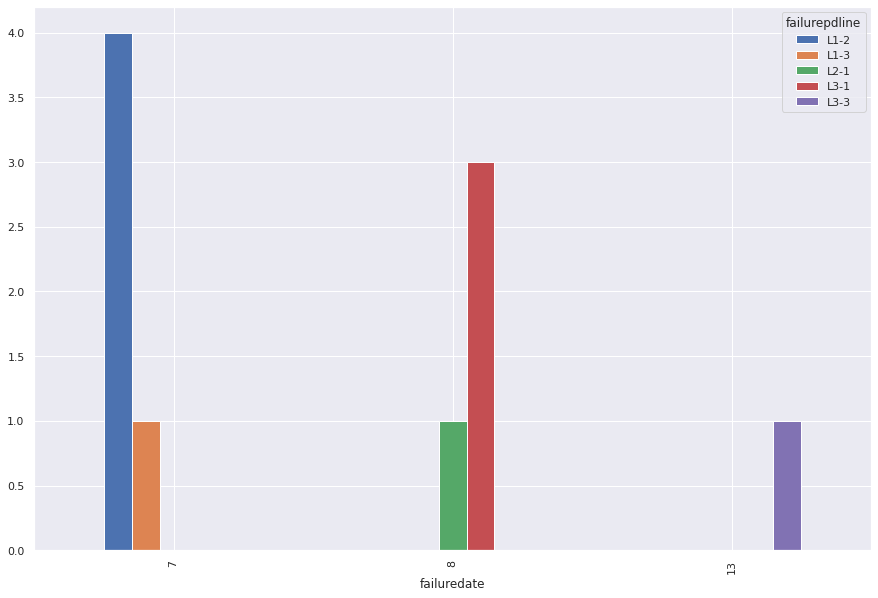

In [ ]:
cmdl = df_gen4[(df.failureeventpoint == 'CMDL')]

if not cmdl.empty:
    times = pd.to_datetime(cmdl.failuredate)
    pd.crosstab(times.dt.hour, cmdl['failurepdline']).plot.bar()
    print("Total: ",cmdl.failureeventpoint.count())
    print(cmdl.groupby('failurepdline')['failurecode'].count())

No Video

Total:  10
failurepdline
L1-2    4
L1-3    1
L2-1    1
L3-1    3
L3-3    1
Name: failurecode, dtype: int64


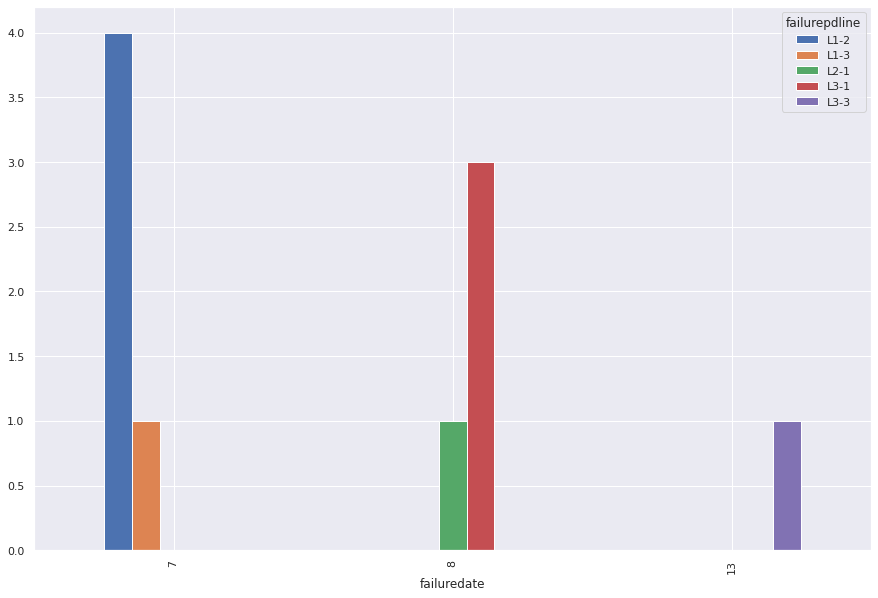

In [ ]:
no_video = df_gen4[(df.failureeventpoint == 'CMDL') & (df.actiondesc == 'Flasheo')]

if not no_video.empty:
    times = pd.to_datetime(cmdl.failuredate)
    pd.crosstab(times.dt.hour, no_video['failurepdline']).plot.bar()
    print("Total: ",no_video.failureeventpoint.count())
    print(no_video.groupby('failurepdline')['failurecode'].count())

##Gen2

In [ ]:
df = df[df['failurecode'].notna() & (df['description'].str.contains('IQPanel2'))]

if not df.empty:
    c = Counter(df.flag)
    bar = plt.bar(c.keys(), c.values())
    bar[0].set_color('y')
    bar[1].set_color('b')
    #bar[2].set_color('r')
    plt.title('Fallas por tipo')

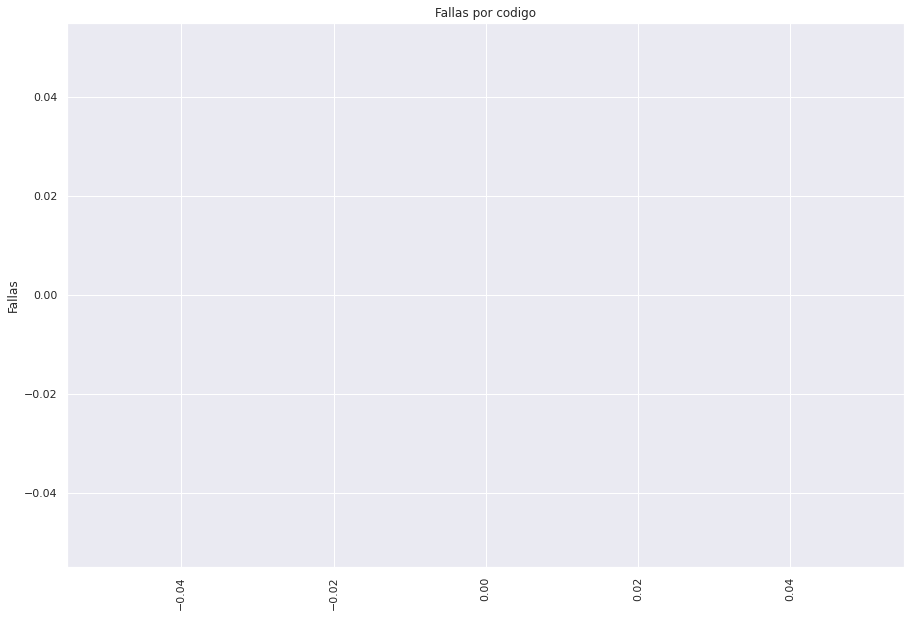

In [ ]:
df2 = df[df['failurecode'].astype(bool)]
cleaned = df2[df2['failurecode'].notna()]
c= Counter(cleaned.failurecode)
plt.xticks(rotation=90)

#plt.ylim([0, 100])

#plt.yticks(np.arange(0, 100, 1.0))

plt.bar(c.keys(), c.values())
plt.title('Fallas por codigo')
plt.ylabel('Fallas');

In [ ]:
powerg = df[(df.failurecode == 'POWERG_END_TO_END') & (df.flag == 'RETRY')]
times = pd.to_datetime(powerg.failuredate)

if not powerg.empty:
    times = pd.to_datetime(powerg.failuredate)
    pd.crosstab(times.dt.hour, powerg['failurepdline']).plot.bar()
    plt.ylabel('Fallas')
    plt.xlabel('Hora')

In [ ]:
srf = df[(df.failurecode == 'SRF_END_TO_END') & (df.flag == 'RETRY') ]

if not srf.empty:
    times = pd.to_datetime(srf.failuredate)
    pd.crosstab(times.dt.hour, srf['failurepdline']).plot.bar()

In [ ]:
if not df.empty:
    c = Counter(df.flag)
    bar = plt.bar(c.keys(), c.values())
    bar[0].set_color('y')
    bar[1].set_color('b')
    #bar[2].set_color('r')
    plt.title('Fallas por tipo')

In [ ]:
iccid = df[(df.failurecode == 'ICCID') & (df.flag == 'RETRY') ]
times = pd.to_datetime(iccid.failuredate)


#plt.xlim([6, 24])
if not iccid.empty:
    plt.xlim([6, 24])
    plt.xticks(np.arange(6, 24, 1.0))
    plt.ylim([0, 10])
    plt.yticks(np.arange(0, 10, 1.0))
    iccid.groupby([times.dt.hour])['failurecode'].count().plot.bar()
    plt.title('ICCID')
    plt.xlabel('Hora')
    plt.ylabel('Fallas')

In [ ]:
wifi = df[(df.failurecode == 'WIFI') & (df.flag == 'RETRY') ]
times = pd.to_datetime(wifi.failuredate)

if not wifi.empty:
    pd.crosstab(times.dt.hour, wifi['failurepdline']).plot.bar()

In [ ]:
storage = df[(df.failurecode == 'STORAGE') & (df.flag == 'RETRY') ]
times = pd.to_datetime(storage.failuredate)

if not storage.empty:
    pd.crosstab(times.dt.hour, storage['failurepdline']).plot.bar()

In [ ]:
cmdl = df[(df.failureeventpoint == 'CMDL')]

if not cmdl.empty:
    times = pd.to_datetime(cmdl.failuredate)
    pd.crosstab(times.dt.hour, cmdl['failurepdline']).plot.bar()